In [10]:
#Netflix Movies & TV Shows
#Exploratory Data Analysis (EDA)
#Netflix is one of the world’s largest online streaming platforms, offering a wide variety of Movies, TV Shows, Documentaries, and Originals.
#As the platform continues to scale globally, understanding the type of content available, audience targeting, and growth trends becomes highly valuable.
#In this project, we perform Exploratory Data Analysis (EDA) on the Netflix dataset containing thousands of titles.

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [13]:
df.shape


(8807, 12)

In [14]:
df.isnull().sum()


,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [15]:
#Data Cleaning
df.drop_duplicates(inplace=True)

df = df.fillna({
    'director':'Unknown',
    'cast':'Unknown',
    'country':'Unknown',
    'rating':'Unknown'
})

df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), errors='coerce')
df['year_added'] = df['date_added'].dt.year


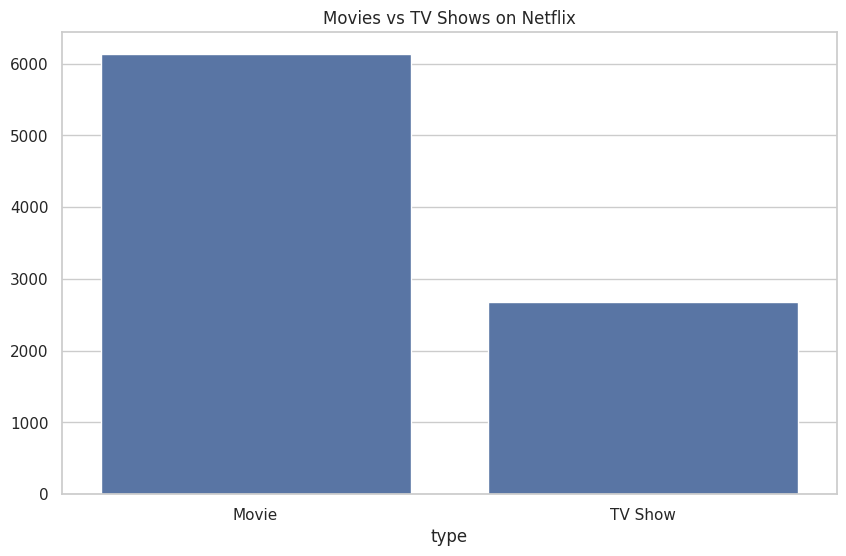

,count
type,
Movie,6131
TV Show,2676


In [16]:
#Movies vs TV Shows
content_type = df['type'].value_counts()
sns.barplot(x=content_type.index, y=content_type.values)
plt.title("Movies vs TV Shows on Netflix")
plt.show()

content_type


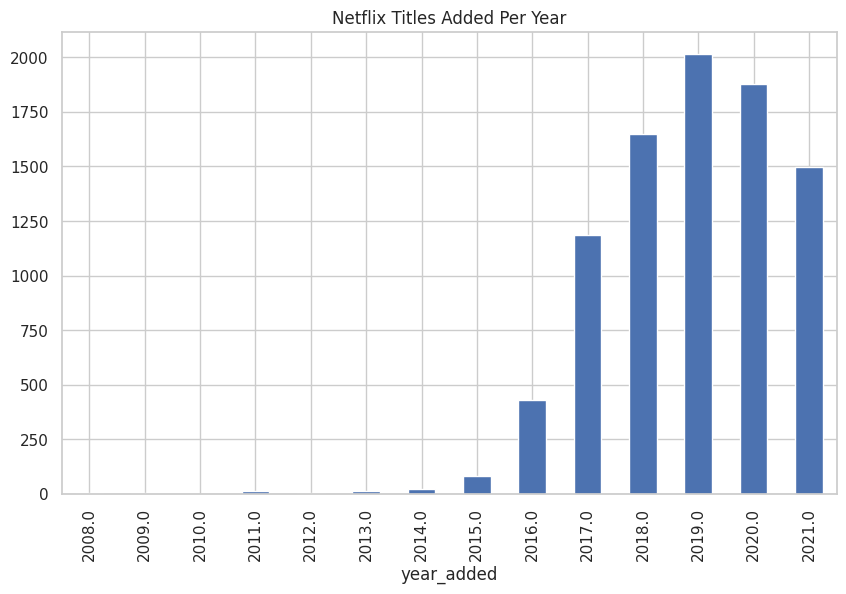

In [17]:
#Content Added Per Year
titles_per_year = df['year_added'].value_counts().sort_index()
titles_per_year.plot(kind='bar')
plt.title("Netflix Titles Added Per Year")
plt.show()


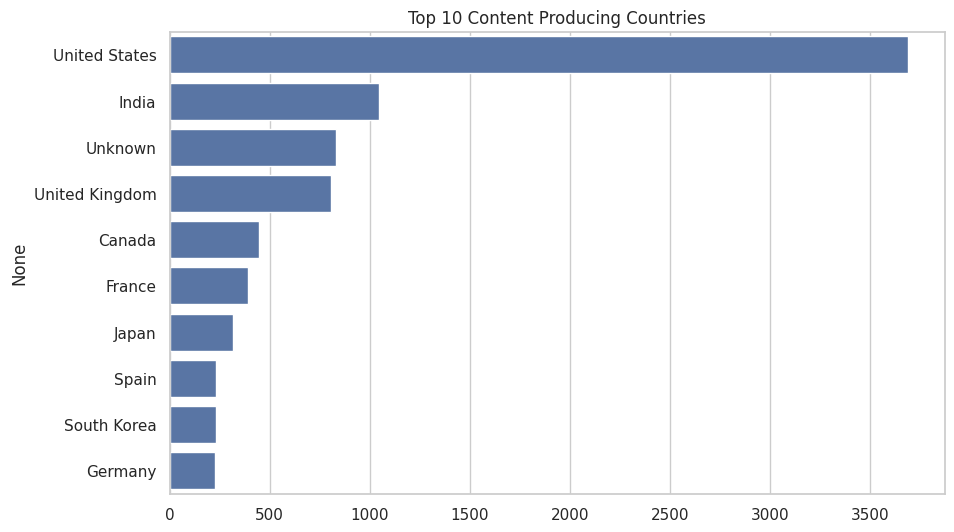

,count
United States,3690
India,1046
Unknown,831
United Kingdom,806
Canada,445
France,393
Japan,318
Spain,232
South Korea,231
Germany,226


In [18]:
#Top Content Producing Countries
countries = df['country'].str.split(',', expand=True).stack().str.strip()
top_countries = countries.value_counts().head(10)

sns.barplot(y=top_countries.index, x=top_countries.values)
plt.title("Top 10 Content Producing Countries")
plt.show()

top_countries


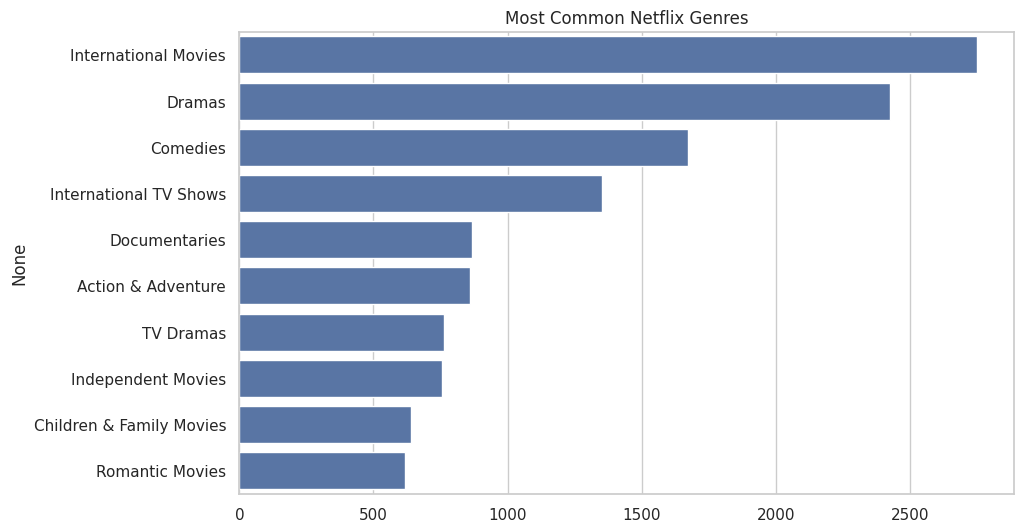

,count
International Movies,2752
Dramas,2427
Comedies,1674
International TV Shows,1351
Documentaries,869
Action & Adventure,859
TV Dramas,763
Independent Movies,756
Children & Family Movies,641
Romantic Movies,616


In [19]:
#Top Genres
genres = df['listed_in'].str.split(',', expand=True).stack().str.strip()
top_genres = genres.value_counts().head(10)

sns.barplot(y=top_genres.index, x=top_genres.values)
plt.title("Most Common Netflix Genres")
plt.show()

top_genres


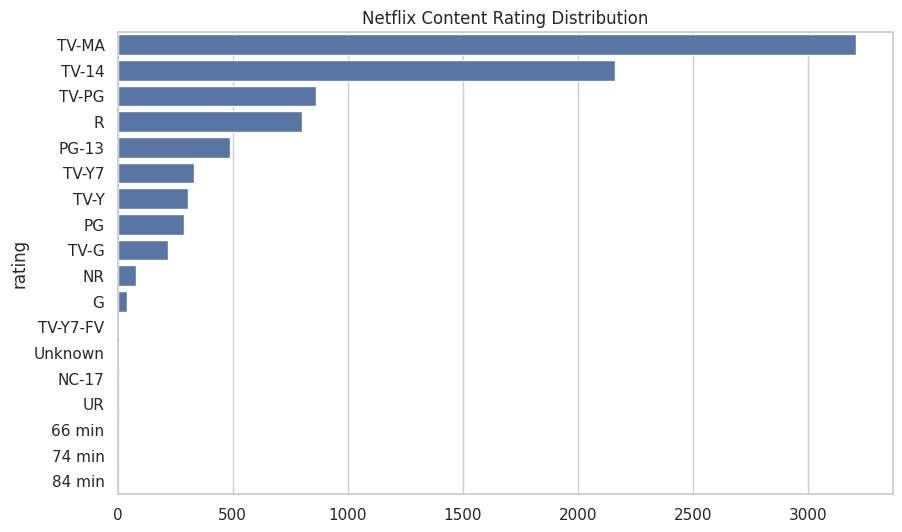

,count
rating,
TV-MA,3207
TV-14,2160
TV-PG,863
R,799
PG-13,490
TV-Y7,334
TV-Y,307
PG,287
TV-G,220


In [20]:
#Rating Distribution
ratings = df['rating'].value_counts()

sns.barplot(y=ratings.index, x=ratings.values)
plt.title("Netflix Content Rating Distribution")
plt.show()

ratings


In [23]:
# Movie Duration Analysis
movies = df[df['type']=="Movie"].copy()

movies['duration_int'] = (
    movies['duration']
    .str.replace(" min","", regex=False)
    .astype(float)
)

movies['duration_int'].describe()


,duration_int
count,6128.000000
mean,99.577187
std,28.290593
min,3.000000
25%,87.000000
50%,98.000000
75%,114.000000
max,312.000000


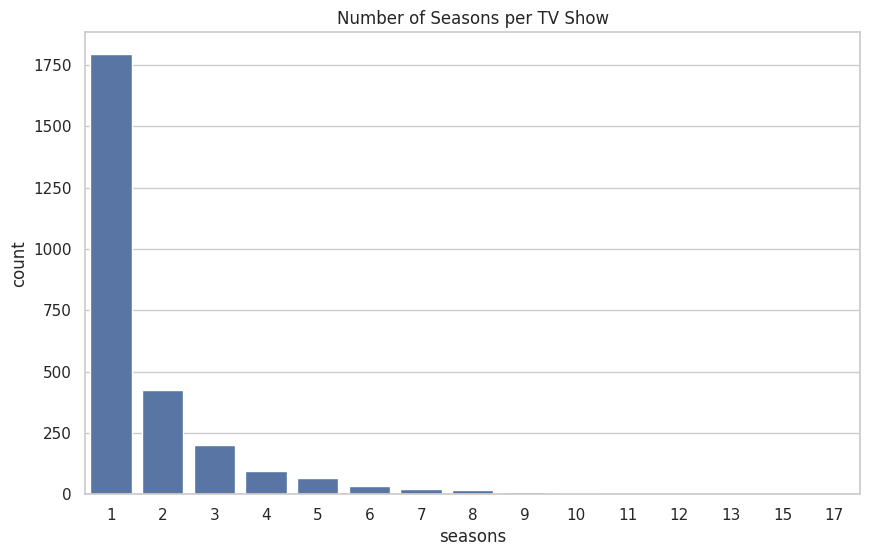

In [24]:
#TV Show Seasons Analysis
shows = df[df['type']=="TV Show"]
shows['seasons'] = shows['duration'].str.replace(" Seasons","").str.replace(" Season","").astype(int)

shows['seasons'].value_counts()
sns.countplot(x=shows['seasons'])
plt.title("Number of Seasons per TV Show")
plt.show()
